In [270]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [271]:
import numpy as np

In [272]:
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [273]:
fish_target=np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [274]:
from sklearn.model_selection import train_test_split 
# 훈련세트와 테스트 테스트를 적절하게 섞어서 만들어주는 함수

In [275]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

In [276]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [277]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

In [347]:
print(test_target) # 28%에 맞게 맞춰진것 4개 정도면 그정도 됨

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [279]:
# 학습
from sklearn.neighbors import KNeighborsClassifier

In [280]:
kn = KNeighborsClassifier()

In [281]:
# 훈련 fit
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [282]:
# 정확도 확인 - 테스트 세트
kn.score(test_input, test_target)

1.0

In [283]:
# 도미 - 길이 25cm, 무게 150g
kn.predict([[25, 150]]) # 도미가 아니고 0인 방어가 나왔음

array([0.])

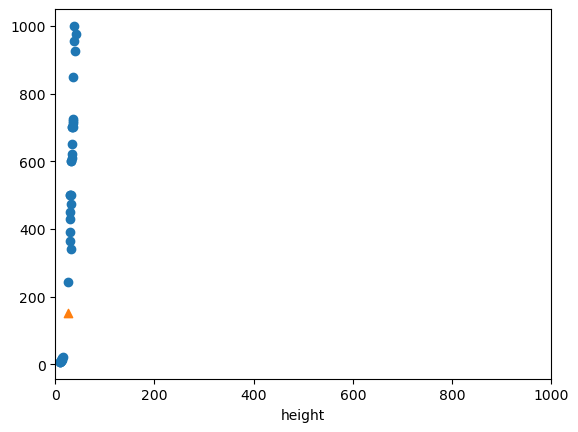

In [349]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25,150,marker='^')
plt.xlim(0, 1000)
plt.xlabel("length")
plt.xlabel("height")
plt.show()

In [351]:
# 측정 수치 [25, 150] 최근접 이웃 5개 kneighbors
distances, indexes = kn.kneighbors([new])
print(indexes)

[[21 14 34 32  5]]


In [353]:
# print(indexes)
train_target[indexes]

array([[1., 1., 1., 1., 1.]])

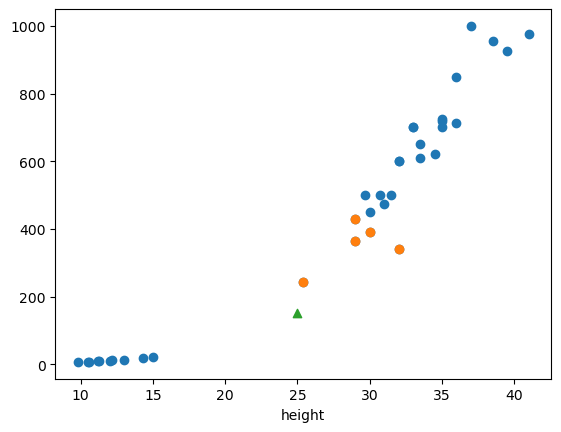

In [355]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(train_input[indexes,0], train_input[indexes,1])
plt.scatter(25,150,marker='^')
#plt.xlim(0, 1000)
plt.xlabel("length")
plt.xlabel("height")
plt.show()

In [288]:
# 평균
mean = np.mean(train_input, axis=0) # 행기준에서 평균구한거
print(mean)

# 표준 편차
std = np.std(train_input, axis=0)
print(std)

[ 27.29722222 454.09722222]
[  9.98244253 323.29893931]


In [289]:
# 표준 점수로 훈련 세트 전처리
train_scaled = (train_input - mean) / std
print(train_scaled) # -1.5~1.5사이로 통일성있게 변함

[[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]
 [-1.60253587 -1.37766373]
 [ 1.22242404  1.45655528]
 [ 0.17057727 -0.07453542]
 [ 0.87180845  0.80390854]
 [ 0.87180845  1.22457184]
 [ 0.37092904  0.06465464]
 [ 0.77163257  0.82246721]
 [ 0.97198434  1.68853872]
 [-1.61255346 -1.3742613 ]
 [ 0.72154463  0.51315596]
 [-1.53241275 -1.3742613 ]
 [ 0.17057727 -0.28177396]
 [ 0.5712808   0.76060496]
 [ 0.34087627  0.14198246]
 [ 1.12224816  1.54934866]
 [ 0.62136874  0.60594934]
 [-1.30200822 -1.34363949]
 [ 0.42101698  0.14198246]
 [-0.19005591 -0.65604058]
 [-1.75279969 -1.38384995]
 [ 0.47110492  0.45129371]
 [-1.68267658 -1.38137546]
 [ 0.62136874  0.48222484]
 [-1.67265899 -1.38292202]
 [ 0.77163257  0.76060496]
 [ 0.47110492  0.45129371]
 [ 0.77163257  0.83793278]
 [-1.43223687 -1.36683783]
 [ 0.27075315 -0.01267317]
 [ 0.47110492 -0.35291555]
 [-1.2318851  -1.34302087]
 [ 0.27075315 -0.19825992]
 [ 1.37268787  1.61121091]]


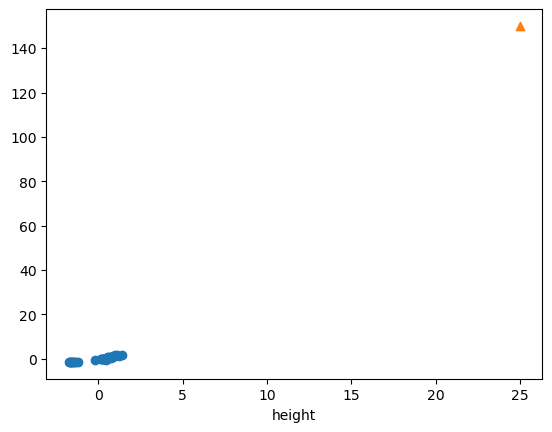

In [290]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(25,150,marker='^')
plt.xlabel("length")
plt.xlabel("height")
plt.show() # 테스트 데이터도 바꿔야함 안바꿔서 이렇게 나온거

In [291]:
new = (np.array([25,150]) - mean) / std
print(new)

[-0.23012627 -0.94060693]


In [292]:
test_scaled = (test_input - mean) / std

In [293]:
kn.fit(train_scaled, train_target)
kn.score(test_scaled, test_target)

1.0

In [294]:
kn.predict([new]) # 이제 도미로 인식함

array([1.])

In [295]:
distances, imdexes = kn.kneighbors([new])
print(indexes)

[[22 26 24  3 11]]


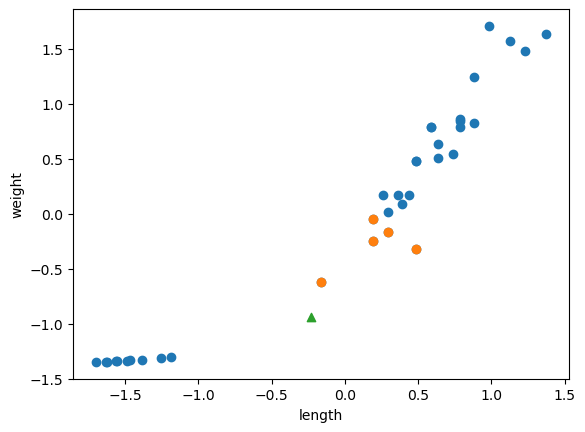

In [357]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1])
# plt.scatter(25, 150, marker='^')
plt.scatter(new[0], new[1], marker='^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [297]:
#plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
## plt.scatter(25,150,marker='^')
#plt.scatter(new[0], new[1], marker='^')
#plt.xlabel("length")
#plt.xlabel("height")
#plt.show()

In [298]:
from sklearn.preprocessing import StandardScaler

In [299]:
ss = StandardScaler()  # fit, transform - 표준점수 변환

In [300]:
ss.fit(fish_data)

StandardScaler()

In [301]:
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [302]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [303]:
kn.score(test_scaled, test_target)

1.0

In [304]:
kn.predict([new])

array([1.])